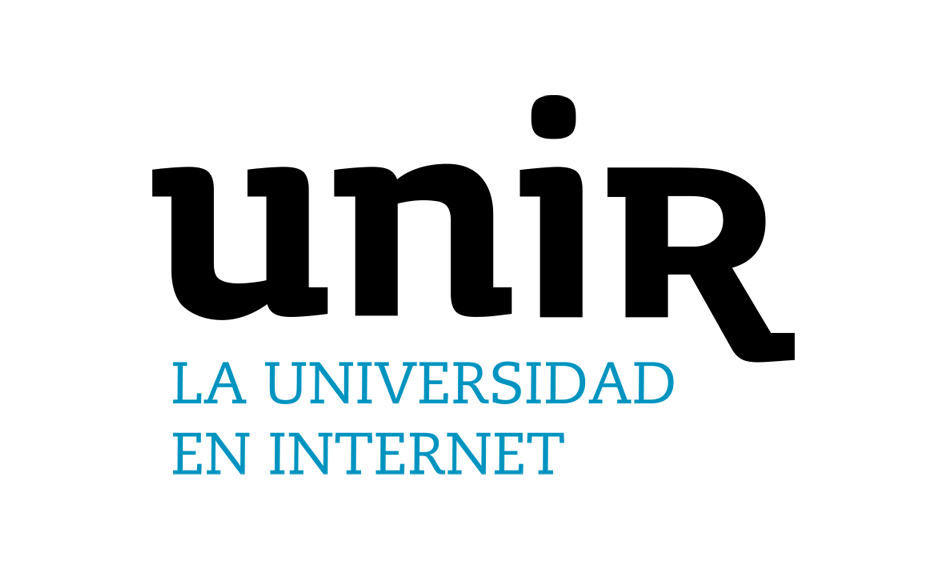
#### Autores :           
                Diego Pedro González González
                Federico Damian Estébanez
                José María Zazo Martín
                
#### Asignatura: Aprendizaje Automático
#### Fecha : 07/06/19

In [1]:
#importamos todas las librerías necesarias para esta actividad
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.gofplots import qqplot
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_log_error
import math
import warnings
warnings.simplefilter('ignore')
import os

# 1 Análisis preliminar

El conjunto de datos de Capital Bike Sharing contiene información relacionada con el programa de bicicletas compartidas de Washington DC en los años 2011 y 2012.Inicialmente vamos a usar uno de los dos archivos proporcionados por UCI, que es el hour.csv. 


In [2]:
# Solo aplica en Kraggle
#datos = pd.read_csv('../input/bike-sharing-dataset/hour.csv')
datos = pd.read_csv(r'hour.csv')
#tenemos 1739 filas y 17 columnas
print(datos.shape)
datos.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# 2 Tratamiento Datashet


Exploración de datos


En ambos archivos tenemos la siguiente información


   * instant: Record index
   * dteday: Date
   * season: Season (1:springer, 2:summer, 3:fall, 4:winter)
   * yr: Year (0: 2011, 1:2012)
   * mnth: Month (1 to 12)
   * hr: Hour (0 to 23)
   * holiday: weather day is holiday or not (extracted from Holiday Schedule)
    (weekday = 0 es Domingo y weekday=6 Sábado en el sistema anglosajón)
   * weekday: Day of the week
   * workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
   * weathersit: (extracted from Freemeteo)
        Clear, Few clouds, Partly cloudy, Partly cloudy
        Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   * temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
   * atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
   * hum: Normalized humidity. The values are divided to 100 (max)
   * windspeed: Normalized wind speed. The values are divided to 67 (max)
   * casual: count of casual users
   * registered: count of registered users
   * cnt: count of total rental bikes including both casual and registered



##### Por tanto tenemos 17 variables más de 17000 registros. Se observa también  que algunas de nuestras variables son categóricas, pero se interpretan como numéricas. 
##### Como primer analisis se parte que las siguientes variables no son necesarias porque no aportan ningún elemento predictorio:

* #### yr = Año ( no se repite como los meses, no aporta información a futuro)
* #### instant= Índice (ya implicito en el dataframe)
* #### dteday = Fecha ( no aporta información relevante)

In [4]:
datos = datos.drop(['instant','dteday','yr'], axis=1)
datos.head()


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Analizamos con más detemiento los tipos de los datos:

Se observa que season, mnth, hr, holiday, weekday, workingday, weathersit deberían se categóricos no tipo int

In [5]:

datos['season'] = datos.season.astype('category')
datos['mnth'] = datos.mnth.astype('category')
datos['hr'] = datos.hr.astype('category')
datos['holiday'] = datos.holiday.astype('category')
datos['weekday'] = datos.weekday.astype('category')
datos['workingday'] = datos.workingday.astype('category')
datos['weathersit'] = datos.weathersit.astype('category')
datos.dtypes

season        category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [6]:
#Existe algún campo vacío?
datos.isnull().any()

season        False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

# 3 Interpretación de los datos

## 3.1 Análisis

Se prodece a visualizar las diferentes relaciones de los datos para ver y analizar si son necesarias todas las variales


Como recordatorio, para los estudios de regresión se tiene que tener en cuenta:

* Las muestras deben representar la población que se está modelando.
* Las variables independientes son linealmente independientes.
* La variación del error es consistente en toda la muestra.

##### Análisis variables temporales

En el eje X podemos poner datos temporales como hora (hr), dia de la semana (weekda) y mes(mnth). 

[Text(0.5, 1.0, 'Uso del sistema: durante la semana (incluido fines de semana)')]

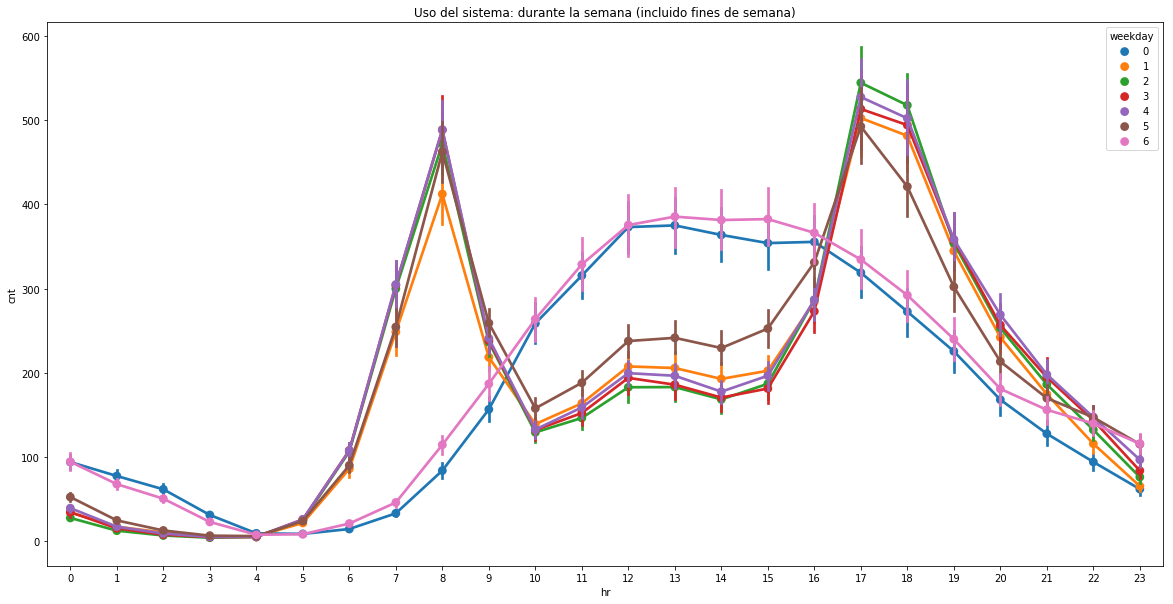

In [7]:
#Análisis de la distribución diaria con la variable cnt(count)-ht(hour)
fig, ax = plt.subplots(figsize=(20,10))
tips = datos[['hr','cnt','weekday']]
sn.pointplot(x="hr", y="cnt",hue="weekday", ax=ax, data=tips)
ax.set(title="Uso del sistema: durante la semana (incluido fines de semana)")

Se observa dos picos , uno por la mañana y otro por la tarde en los días laborales. Se aprecia que el sabado (6) y el domingo (0) la curva se comporta de otra manera. Esta variable aparentemente puede ser útil. Analizamos su distribución normal

[Text(0.5, 1.0, 'Distribución mensual')]

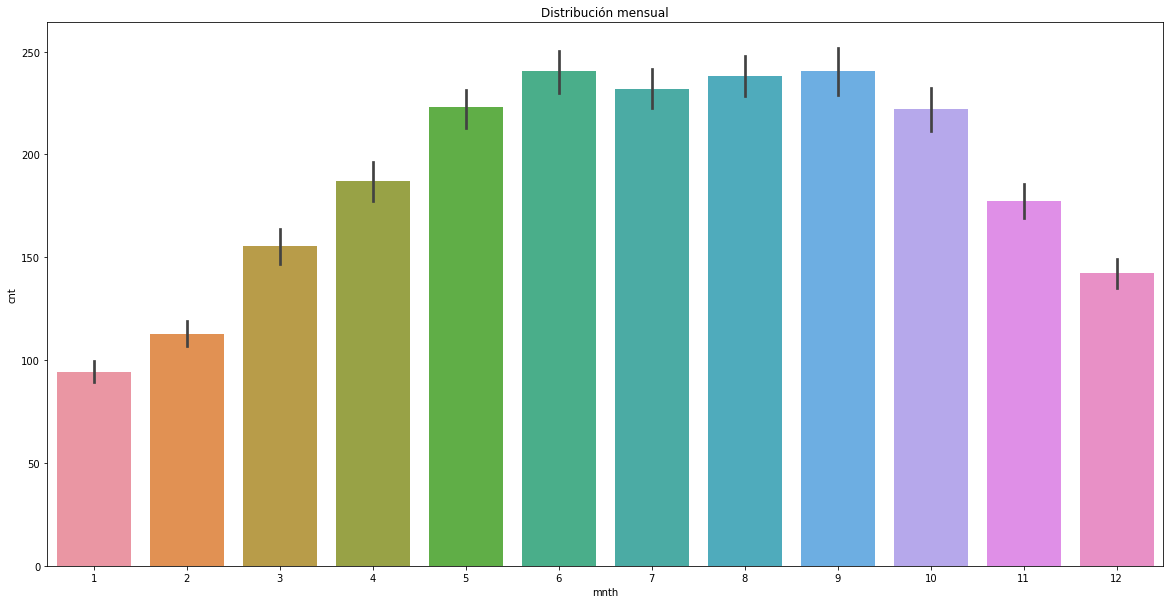

In [8]:
#Análisis de la distribución mensual con la variable cnt(count)
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=datos[['mnth',
                      'cnt']],
            x='mnth', y='cnt')
ax.set(title="Distribución mensual")



[Text(0.5, 1.0, 'Distribución diaria')]

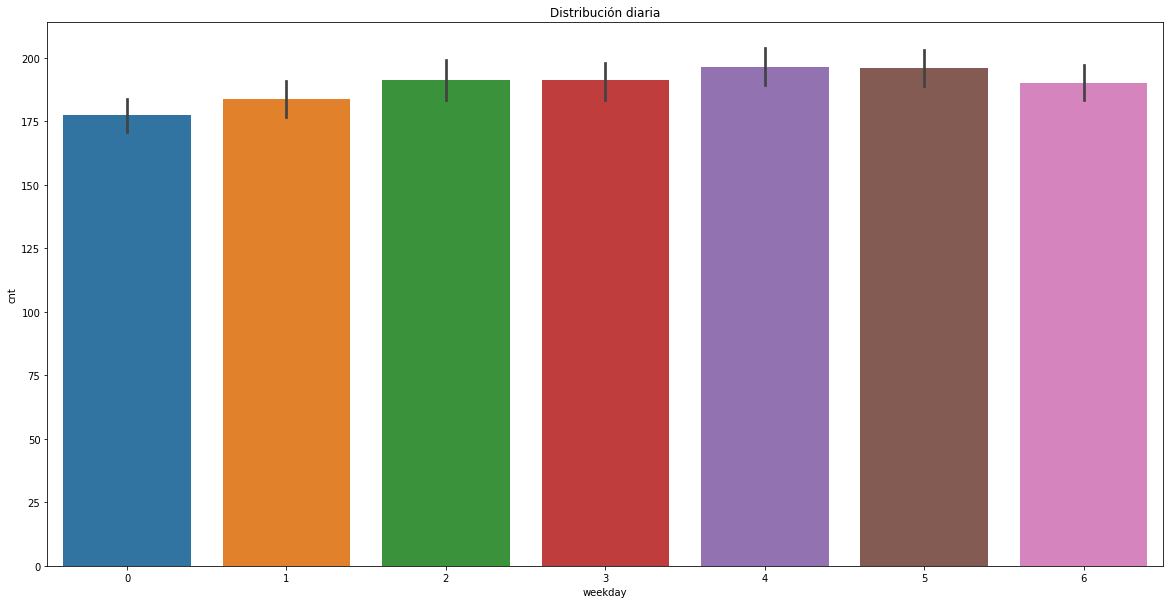

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=datos[['weekday',
                      'cnt']],
            x='weekday', y='cnt')
ax.set(title="Distribución diaria")

Si comprobamos la distribución mensual,se aprecia que puede aportar valor en el uso del sistema. Sin embargo, si comprobamos la distribución diaria, no se aprecia mucha diferencia.

##### Estudio datos temporales 1

[Text(0.5, 1.0, 'Uso del sistema: condición temporal')]

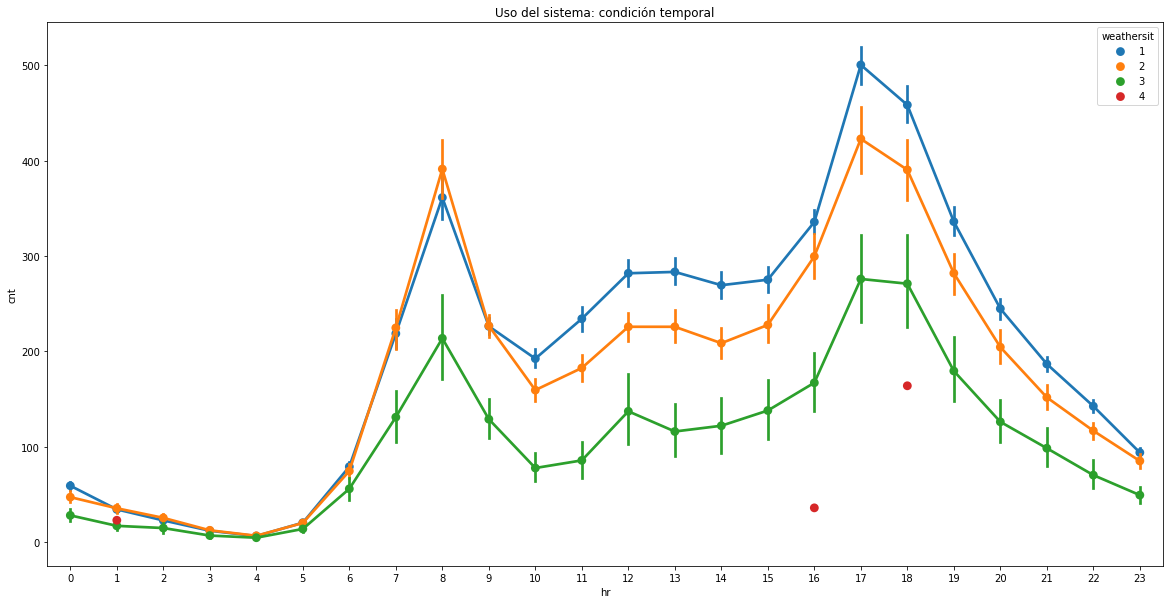

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=datos[['hr',
                       'cnt',
                       'weathersit']],
            x='hr', y='cnt',
            hue='weathersit', ax=ax)
ax.set(title="Uso del sistema: condición temporal")

[Text(0.5, 1.0, 'Uso del sistema: condición estacional')]

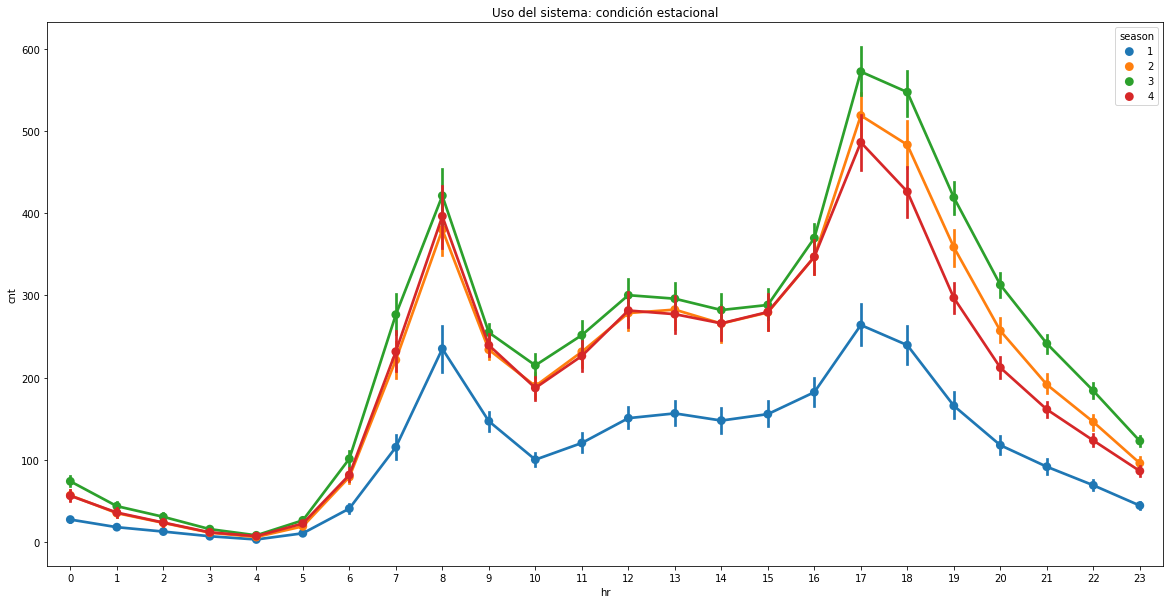

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=datos[['hr',
                       'cnt',
                       'season']],
            x='hr', y='cnt',
            hue='season', ax=ax)
ax.set(title="Uso del sistema: condición estacional")


#### Si comprueba que son datos útiles para el entrenamiento del sistema. La gente usa más el sistema cuando está soleado y es Agosto.

##### Estudio variables restantes

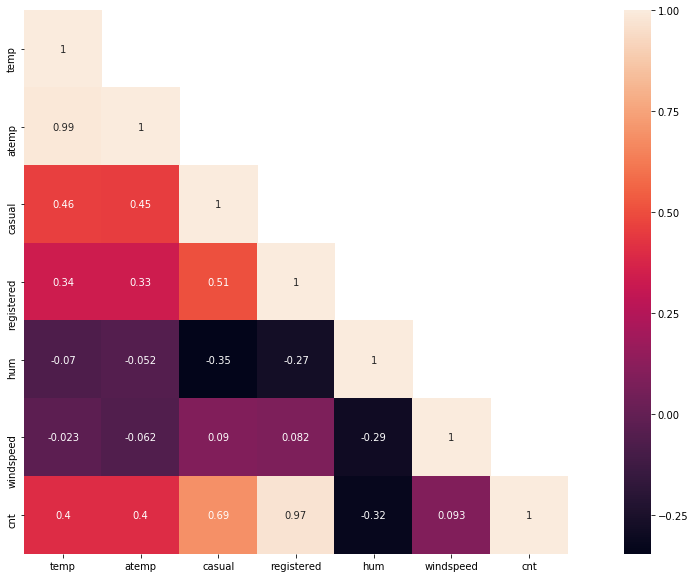

In [12]:

data_correlation = datos[['temp', 'atemp', 'casual', 'registered', 'hum', 'windspeed', 'cnt']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)


De este gráfico podemos extraer primero que la variable atemp no es independiente y depende de temp. (se eliminará)
Que windspeed no es relevante para el contaje.


Otro problema son nuestras variables register y casual. Si se desea predecir el número total de usuarios en el futuro puede existir problemas. Aunque se tenga datos del  mes, del día , de la semana, de la temperatura y las condiciones meteorológicas, es imposible tener el número de usuarios register y casual dado que es exactamente lo que está tratando de predecir.

Por tanto el cnt es una descomposición de estas dos variables (existe dependencia), podríamos tener problemas si permanecen en el conjunto de datos. Así que, vamos a eliminar también.

 Se ha realizado la prueba dejando los valores register y casual, se comprueba la total dependencia de cnt con esos dos valores:
 
media para los algoritmos elegidos:
    * DecisionTreeRegressor:-25.103798519775125
    * RandomForestRegressor:-10.791948614164024
Random forest mejores valores (automático)
    * best_parameters = {'max_features': 'auto', 'n_estimators': 300}
    * best_accuracy = 0.9997122551824882
Media con los valores de entrenamiento:
    * 0.9997807656192854
Error absoluto(y_test, y_pred):
    * 0.8659071729957806


Eliminamos las variables que hemos estudiado que no son necesarias.

In [13]:
datos = datos.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)   
datos.head(1)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,cnt
0,1,1,0,0,6,0,1,0.24,0.81,16


# 4 Algoritmos de regresión

Separamos los datos en datos en variables de entrada X y variables de salida

In [14]:
y = datos['cnt']
X = datos.drop(['cnt'], axis=1)
X.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum
0,1,1,0,0,6,0,1,0.24,0.81
1,1,1,1,0,6,0,1,0.22,0.80
2,1,1,2,0,6,0,1,0.22,0.80
3,1,1,3,0,6,0,1,0.24,0.75
4,1,1,4,0,6,0,1,0.24,0.75


Generamos un conjunto de test y entrenamiento

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Análisis preliminar 

In [16]:
#analisis preliminar para establecer cuál de los dos algoritmos será el óptimo
models = [DecisionTreeRegressor(), 
          RandomForestRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    print("Accuracy predicted: %4.4f" % predicted.mean())  
    
for model in models:
    test_algorithms(model)
    

Accuracy predicted: -8491.0522
Accuracy predicted: -5073.8098


El algoritmo de random  forest es el que más precisión va a tener.

## 4.1 Función Random Forest Regressor

In [17]:
def RandomForestR(X_train, y_train ,X_test, y_test,best_values,best_tuple):
    
    #Extraemos los mejores parámetros para el RandomForestRegressor
    regressor = RandomForestRegressor()
    if best_values == True :
        parameters = [{'n_estimators' : [100,200,300], 
                       'max_features' : ['auto','sqrt','log2']}]
        grid_search = GridSearchCV(estimator = regressor, param_grid = parameters,cv=4)
        grid_search = grid_search.fit(X_train, y_train)
        best_parameters = grid_search.best_params_
        best_accuracy = grid_search.best_score_
        print("Best parameters : ", best_parameters)
        print("Best accuracy : " , best_accuracy)
    else :
        #valores fijos.Modo depuración
         best_parameters = best_tuple
    # Usamos los mejores valores extraídos
    regressor = RandomForestRegressor(n_estimators = best_parameters['n_estimators'], 
                                      max_features = best_parameters['max_features']) 
    regressor.fit(X_train,y_train)
    #Predecimos los valores
    y_pred_RFR = regressor.predict(X_test)
    #Extraemos la precisión del modelo entrenado
    accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =4)
    print("Accuracy predicted: %4.4f" % accuracy.mean())
    #Extraemos el error medio absoluto
    mean_absolute_error(y_test, y_pred_RFR)
    print("Mean absolute error: %4.4f" % mean_absolute_error(y_test, y_pred_RFR))
    
    ########Gráficos
    
    #Valores residuales vs Valores observados
    residuals = y_test-y_pred_RFR
    fig, ax = plt.subplots()
    ax.scatter(y_test, residuals)
    ax.axhline(lw=2,color='black')
    ax.set_xlabel('Valores observados')
    ax.set_ylabel('Valores residuales')
    ax.title.set_text('Grafica residual | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred_RFR))))
    plt.show()
    
    #Importancia relativa de las variables

    feature_importance = regressor.feature_importances_
    feature_importance = 100*(feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Importancia variables')
    plt.title(' Importancia relativa')
    plt.show()
    
    #Distribución valores reales vs valores predichos
    
    plt.scatter(y_test,y_pred_RFR)
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])
    plt.show()
    
    return y_pred_RFR , regressor


## 4.2 Función Decision Tree Regressor

In [18]:
def DecisionTreeR(X_train, y_train ,X_test, y_test,best_values,best_tuple):
    regressor = DecisionTreeRegressor()
    if best_values == True :
        parameters = {"criterion": ["mse", "mae"],
                      "min_samples_split": [10, 20, 40],
                      "max_depth": [2, 6, 8],
                      "min_samples_leaf": [20, 40, 100],
                      "max_leaf_nodes": [5, 20, 100],
                      }
        grid_search = GridSearchCV(estimator = regressor, param_grid = parameters,cv=4)
        grid_search = grid_search.fit(X_train, y_train)
        best_parameters = grid_search.best_params_
        best_accuracy = grid_search.best_score_
        print("Best parameters : ", best_parameters)
        print("Best accuracy : " , best_accuracy)
    else :
         best_parameters = best_tuple
    #Decision Tree Regressor model
    regressor = DecisionTreeRegressor(criterion = best_parameters['criterion'], 
                                      max_depth= best_parameters['max_depth'], 
                                      max_leaf_nodes= best_parameters['max_leaf_nodes'], 
                                      min_samples_leaf= best_parameters['min_samples_leaf'], 
                                      min_samples_split= best_parameters['min_samples_split']) 
    regressor.fit(X_train,y_train)
    # Predecimos valores
    
    y_pred_dtr = regressor.predict(X_test)
    
    #Extraemos la precisión del modelo entreando
    
    accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =4)
    print("Accuracy predicted: %4.4f" % accuracy.mean())
    #Extraemos el error medio absoluto
    
    print("Mean absolute error: %4.4f" % mean_absolute_error(y_test, y_pred_dtr))
    
    ########Gráficos
    
    #Valores residuales vs Valores observados
    
    residuals = y_test-y_pred_dtr
    fig, ax = plt.subplots()
    ax.scatter(y_test, residuals)
    ax.axhline(lw=2,color='black')
    ax.set_xlabel('Valores observados')
    ax.set_ylabel('Valores residuales')
    ax.title.set_text('Grafica residual | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred_RFR))))
    plt.show()
    
    #Importancia relativa de las variables

    feature_importance = regressor.feature_importances_
    feature_importance = 100*(feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Importancia variables')
    plt.title(' Importancia relativa')
    plt.show()
    
    #Distribución valores reales vs valores predichos
    plt.scatter(y_test,y_pred_RFR)
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])
    plt.show()
    
    return y_pred_dtr , regressor


## 4.3  Comparativa algoritmos de regresión

##### NOTA: Para facilitar la compilación se han introducido los mejores valores encontradas en otras compilaciones

### 4.3.1 RandomForest

Accuracy predicted: 0.8619
Mean absolute error: 40.8749


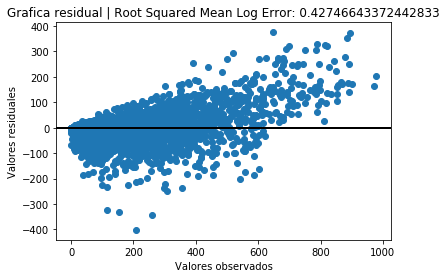

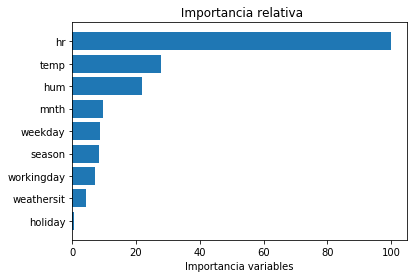

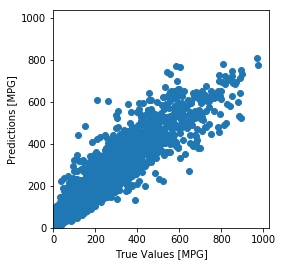

In [19]:
config ={'max_features': 'log2', 'n_estimators': 200}
y_pred_RFR , regressorRF = RandomForestR(X_train, y_train ,X_test, y_test,False,config)

### 4.3.2 Regresion Decision Tree 

Accuracy predicted: 0.7927
Mean absolute error: 54.5103


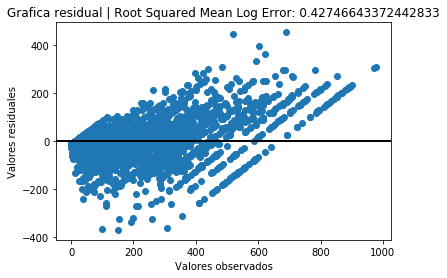

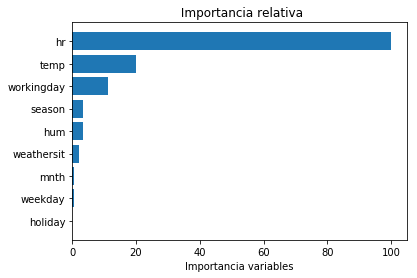

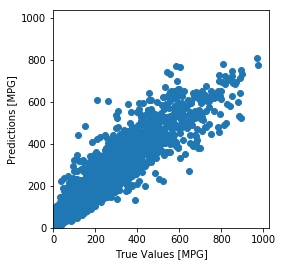

In [20]:
config= {'criterion': 'mse', 
         'max_depth': 8, 
         'max_leaf_nodes': 100, 
         'min_samples_leaf': 20, 
         'min_samples_split': 10}
y_pred_dtr , regressorDT = DecisionTreeR(X_train, y_train ,X_test, y_test,False,config)

## 4.4 Conclusión regresión

Hemos estado probando de forma iterativa(hemos usado Kraggle) y concluimos que cuando pasamos variables categóricas  a dummy perdemos precisión en nuestros algoritmos. Así pues los mejores resultados han sido:

Random forest mejores valores (automático)

* best_parameters = {'max_features': 'log2', 'n_estimators': 250}
* Accuracy predicted: 0.8620
* Mean absolute error: 41.1052

Regresion tree mejores valores (automático)

* best_parameters ={'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
* Accuracy predicted: 0.7927
* Mean absolute error: 54.5103



# 5 Algoritmos de clasificación

Separamos los datos en datos en variables de entrada X y variables de salida

In [21]:
#Creamos unos labels para poder determinar si es alto o bajo 
def sales(row):
    if row['cnt'] <= 20:
        val = "low"
    else:
        val = "high"
    return val

In [22]:
datos_r=datos
datos_r['sales'] = datos.apply(sales, axis=1)
X = datos_r.drop(['sales','cnt'], axis=1)
X.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum
0,1,1,0,0,6,0,1,0.24,0.81
1,1,1,1,0,6,0,1,0.22,0.80
2,1,1,2,0,6,0,1,0.22,0.80
3,1,1,3,0,6,0,1,0.24,0.75
4,1,1,4,0,6,0,1,0.24,0.75


In [23]:
y=datos_r['sales']
y.head()

0     low
1    high
2    high
3     low
4     low
Name: sales, dtype: object

Generamos un conjunto de test y entrenamiento

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#analisis preliminar para establecer cuál de los dos algoritmos será el óptimo
models = [RandomForestClassifier(), 
          DecisionTreeClassifier()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    print("Accuracy predicted: %4.4f" % predicted.mean())  
    
for model in models:
    test_algorithms(model)

Accuracy predicted: 0.9582
Accuracy predicted: 0.9471


## 5.1 Función Random Forest Classifier

In [26]:
def RandomForestC(X_train, y_train ,X_test, y_test,best_values,best_tuple):
   
    #Extraemos los mejores parámetros para el RandomForestRegressor
    regressor = RandomForestClassifier()
    if best_values == True :
        parameters = [{'n_estimators' : [100,200,300], 
                       'max_features' : ['auto','sqrt','log2']}]
        grid_search = GridSearchCV(estimator = regressor, param_grid = parameters,cv=4)
        grid_search = grid_search.fit(X_train, y_train)
        best_parameters = grid_search.best_params_
        best_accuracy = grid_search.best_score_
        print("Best parameters : ", best_parameters)
        print("Best accuracy : " , best_accuracy)
    else :    
        #valores fijos.Modo depuración
        best_parameters=best_tuple
    # Usamos los mejores valores extraídos
    regressor = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                      max_features = best_parameters['max_features']) 
    regressor.fit(X_train,y_train)
    #Predecimos los valores
    y_pred_RFR = regressor.predict(X_test)
    #Extraemos la precisión del modelo entreando
    accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =4)
    
    print("Matriz de confusion: ")
    print(pd.crosstab(y_test, y_pred_RFR, rownames=['Actual Sales'], colnames=['Predicted Sales']))
    print("Accuracy predicted: %4.4f" % accuracy.mean())
    print("Accuracy score: %4.4f" % accuracy_score(y_test, y_pred_RFR))
    print("F1_high : %4.4f" % f1_score(y_test, y_pred_RFR,  pos_label="high"))
    print("F1_low : %4.4f" % f1_score(y_test, y_pred_RFR,  pos_label="low")) 
    
    ########Gráficos
    
    #Importancia relativa de las variables

    feature_importance = regressor.feature_importances_
    feature_importance = 100*(feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Importancia variables')
    plt.title(' Importancia relativa')
    plt.show()

    return y_pred_RFR , regressor

## 5.2 Función Decision Tree Classifier

In [27]:
def DecisionTreeC(X_train, y_train ,X_test, y_test,best_values,best_tuple):
    regressor = DecisionTreeClassifier()
    if best_values == True :
        parameters = {"criterion": ["gini", "entropy"],
                      "min_samples_split": [10, 20, 40],
                      "max_depth": [2, 6, 8],
                      "min_samples_leaf": [20, 40, 100],
                      "max_leaf_nodes": [5, 20, 100],
                      }
        grid_search = GridSearchCV(estimator = regressor, param_grid = parameters,cv=4)
        grid_search = grid_search.fit(X_train, y_train)
        best_parameters = grid_search.best_params_
        best_accuracy = grid_search.best_score_
        print("Best parameters : ", best_parameters)
        print("Best accuracy : " , best_accuracy)
    else :
         best_parameters = best_tuple
    #Decision Tree Regressor model
    regressor = DecisionTreeClassifier(criterion = best_parameters['criterion'], 
                                      max_depth= best_parameters['max_depth'], 
                                      max_leaf_nodes= best_parameters['max_leaf_nodes'], 
                                      min_samples_leaf= best_parameters['min_samples_leaf'], 
                                      min_samples_split= best_parameters['min_samples_split']) 
    regressor.fit(X_train,y_train)
    # Predecimos valores
    
    y_pred_dtr = regressor.predict(X_test)
    
    #Extraemos la precisión del modelo entreando
    
    accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =4)

    
    print("Matriz de confusion: ")
    print(pd.crosstab(y_test, y_pred_dtr, rownames=['Actual Sales'], colnames=['Predicted Sales']))
    print("Accuracy predicted: %4.4f" % accuracy.mean())
    print("Accuracy score: %4.4f" % accuracy_score(y_test, y_pred_dtr))
    print("F1_high : %4.4f" % f1_score(y_test, y_pred_dtr,  pos_label="high"))
    print("F1_low : %4.4f" % f1_score(y_test, y_pred_dtr,  pos_label="low"))
        
    ########Gráficos
       
    #Importancia relativa de las variables

    feature_importance = regressor.feature_importances_
    feature_importance = 100*(feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Importancia variables')
    plt.title(' Importancia relativa')
    plt.show()
    
    
    return y_pred_dtr , regressor

## 5.3 Comparativa clasificadores

### 5.3.1 RandomForestClassifier

Best parameters :  {'max_features': 'sqrt', 'n_estimators': 300}
Best accuracy :  0.9636769042652665
Matriz de confusion: 
Predicted Sales  high  low
Actual Sales              
high             2836   62
low                59  519
Accuracy predicted: 0.9631
Accuracy score: 0.9652
F1_high : 0.9791
F1_low : 0.8956


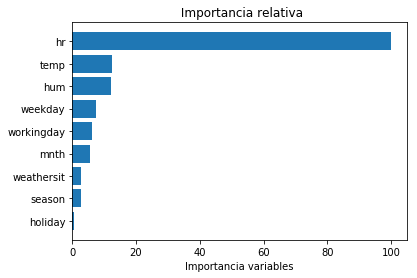

In [28]:
#Se propone unos valores y se compara con los calculados
config_c = {'max_features': 'log2', 'n_estimators': 300}
y_pred_RFR_cl , regressorRF_cl = RandomForestC(X_train, y_train ,X_test, y_test,True,config_c)

### 5.3.2 DecisionTreeClassifier

Best parameters :  {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
Best accuracy :  0.9590735812414587
Matriz de confusion: 
Predicted Sales  high  low
Actual Sales              
high             2849   49
low                78  500
Accuracy predicted: 0.9591
Accuracy score: 0.9635
F1_high : 0.9782
F1_low : 0.8873


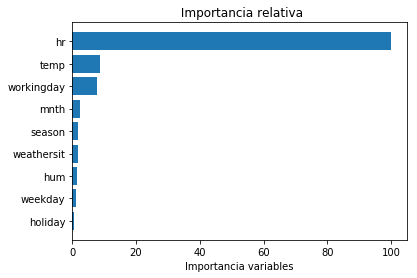

In [29]:
#Se propone unos valores y se compara con los calculados
config_c= {'criterion': 'entropy', 
         'max_depth': 8, 
         'max_leaf_nodes': 100, 
         'min_samples_leaf': 20, 
         'min_samples_split': 10}
y_pred_dtr_cl , regressorDT_cl = DecisionTreeC(X_train, y_train ,X_test, y_test,True,config_c)

## 5.4 Conclusiones

Se demuestra que ambos clasificadores se comportan de manera similar. La ayuda de un label  ha facilitado enormemente la tarea y ha conseguido resultados precisos. En todos los casos el algoritmo de Random Forest ha obtenido los mejores resultados. Se ha probado en crear dummies pero en todos los casos la precisión simpre era peor que los resultados obtenidos.